<h5>Data Cleaning</h5>

<p>After creating the join, we start the data cleaning process on the final csv</p>

<p>Target Variable --> KIQ022</p>

In [30]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("C:/Users/Mohit R Kamble/Downloads/06022024_Cleaned_1.csv")

df.shape

(5588, 40)

In [3]:
df.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,INDFMIN2,DR1TPROT,DR1TSFAT,DR1TMFAT,DR1TPFAT,BPXDI1,...,RXDRSD1,DIQ280,DIQ010,BPQ030,BPQ040A,OSQ130,KIQ022,KIQ025,KIQ026,KID028
0,73557,1,69,4,4.0,43.63,17.819,18.493,8.829,72.0,...,NaN,12.0,1.0,1.0,1.0,2.0,2.0,NaN,2.0,NaN
1,73558,1,54,3,7.0,338.13,53.408,35.481,20.505,62.0,...,Restless legs syndrome,NaN,1.0,1.0,2.0,2.0,2.0,NaN,2.0,NaN
2,73559,1,72,3,10.0,64.61,25.263,20.902,12.953,90.0,...,Type 2 diabetes mellitus,14.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,NaN
3,73561,2,73,3,15.0,55.24,4.479,26.216,1.263,86.0,...,NaN,NaN,2.0,2.0,1.0,1.0,1.0,2.0,2.0,NaN
4,73562,1,56,1,9.0,55.11,22.155,40.013,23.550,84.0,...,Essential (primary) hypertension,NaN,2.0,1.0,1.0,2.0,2.0,NaN,2.0,NaN


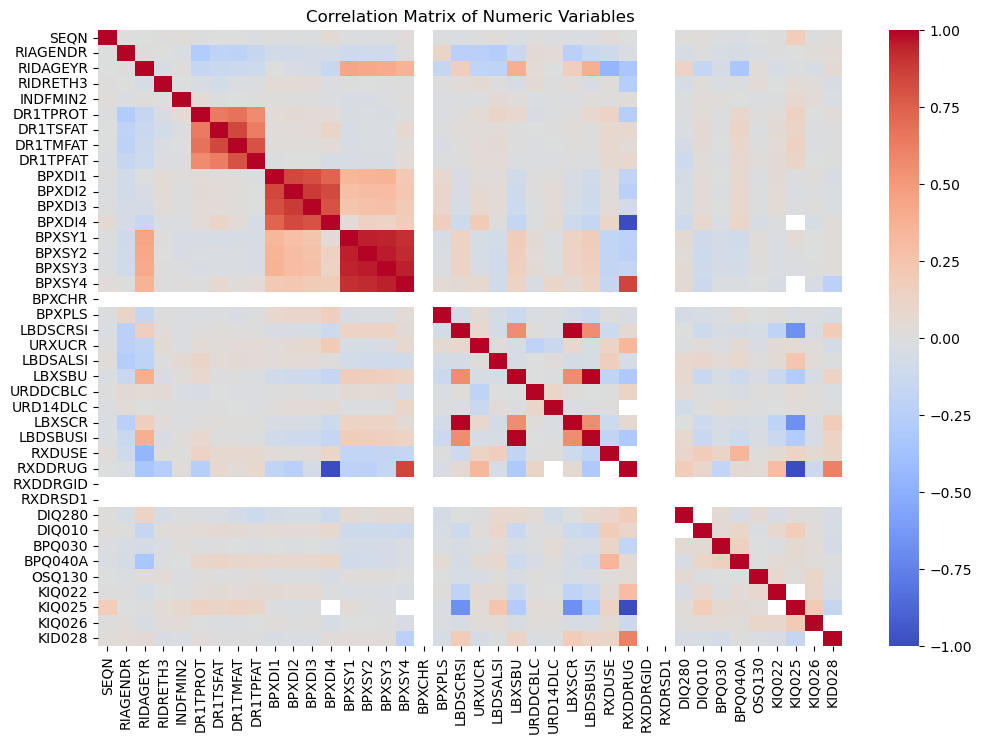

In [4]:
for col in df.columns:

    df[col] = pd.to_numeric(df[col], errors='coerce')
 
# Drop columns with any non-convertible values (completely non-numeric columns)

df = df.select_dtypes(include=[np.number])
 
# Calculate the correlation matrix, ignoring missing values

correlation_matrix = df.corr(method='pearson')  # Pearson still appropriate here
 
# Plotting the correlation matrix without annotations

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, cmap='coolwarm')

plt.title('Correlation Matrix of Numeric Variables')

plt.show()

In [5]:
print(df.isnull().mean()*100)

SEQN          0.000000
RIAGENDR      0.000000
RIDAGEYR      0.000000
RIDRETH3      0.000000
INDFMIN2      1.216893
DR1TPROT      9.681460
DR1TSFAT      9.681460
DR1TMFAT      9.681460
DR1TPFAT      9.681460
BPXDI1        8.536149
BPXDI2        5.189692
BPXDI3        5.028633
BPXDI4       92.949177
BPXSY1        8.536149
BPXSY2        5.189692
BPXSY3        5.028633
BPXSY4       92.949177
BPXCHR      100.000000
BPXPLS        3.292770
LBDSCRSI      4.652827
URXUCR       67.465999
LBDSALSI      4.652827
LBXSBU        4.652827
URDDCBLC     67.519685
URD14DLC     67.519685
LBXSCR        4.652827
LBDSBUSI      4.652827
RXDUSE        0.000000
RXDDRUG      98.979957
RXDDRGID    100.000000
RXDRSD1     100.000000
DIQ280       91.034359
DIQ010        0.000000
BPQ030       62.598425
BPQ040A      62.598425
OSQ130       33.643522
KIQ022        0.000000
KIQ025       96.743021
KIQ026        0.000000
KID028       90.694345
dtype: float64


In [6]:
df.describe()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,INDFMIN2,DR1TPROT,DR1TSFAT,DR1TMFAT,DR1TPFAT,BPXDI1,...,RXDRSD1,DIQ280,DIQ010,BPQ030,BPQ040A,OSQ130,KIQ022,KIQ025,KIQ026,KID028
count,5588.000000,5588.000000,5588.000000,5588.000000,5520.000000,5047.000000,5047.000000,5047.000000,5047.000000,5111.000000,...,0.0,501.000000,5588.000000,2090.000000,2090.000000,3708.000000,5588.000000,182.000000,5588.000000,5.200000e+02
mean,78664.839835,1.522369,49.151038,3.309950,10.697464,82.575918,25.949625,28.419630,19.144394,69.912346,...,NaN,370.670259,1.907480,1.225359,1.164115,1.983279,1.976199,1.895604,1.919470,3.064615e+01
std,2919.034378,0.499544,17.506615,1.495005,13.883114,46.041589,16.784810,18.115066,13.505438,12.809554,...,NaN,477.548055,0.417782,0.623789,0.436876,0.590584,0.305617,0.306617,0.417481,1.670744e+02
min,73557.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,4.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.397605e-79
25%,76157.500000,1.000000,34.000000,3.000000,5.000000,52.165000,14.223500,16.277500,10.134000,62.000000,...,NaN,6.800000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000e+00
50%,78703.500000,2.000000,48.000000,3.000000,7.000000,73.980000,22.517000,24.926000,16.144000,70.000000,...,NaN,8.200000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000e+00
75%,81161.250000,2.000000,63.000000,4.000000,14.000000,101.675000,33.548000,36.201500,24.569000,78.000000,...,NaN,999.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000e+00
max,83729.000000,2.000000,80.000000,7.000000,99.000000,557.870000,177.467000,221.673000,182.462000,122.000000,...,NaN,999.000000,9.000000,9.000000,9.000000,9.000000,9.000000,2.000000,9.000000,9.990000e+02


<p>Dropping the columns with missing values above 90%</p>

In [7]:
if df is not None:
    df.drop(columns=['BPXDI4', 'BPXSY4', 'BPXCHR', 'DIQ280', 'KIQ025', 'KID028','URXUCR','URDDCBLC','URD14DLC','BPQ030','BPQ040A'], axis=1, inplace=True)
    print(df)
else:
    print("Error: DataFrame 'df' is not initialized.")



       SEQN  RIAGENDR  RIDAGEYR  RIDRETH3  INDFMIN2  DR1TPROT  DR1TSFAT  \
0     73557         1        69         4       4.0     43.63    17.819   
1     73558         1        54         3       7.0    338.13    53.408   
2     73559         1        72         3      10.0     64.61    25.263   
3     73561         2        73         3      15.0     55.24     4.479   
4     73562         1        56         1       9.0     55.11    22.155   
...     ...       ...       ...       ...       ...       ...       ...   
5583  83723         1        61         1      10.0     70.52    35.266   
5584  83724         1        80         3       8.0     77.09    24.006   
5585  83726         1        40         1       9.0       NaN       NaN   
5586  83727         1        26         2      77.0    223.32    80.414   
5587  83729         2        42         4       7.0     89.37    29.372   

      DR1TMFAT  DR1TPFAT  BPXDI1  ...  LBXSCR  LBDSBUSI  RXDUSE  RXDDRUG  \
0       18.493     8.82

In [8]:
print(df.isnull().mean()*100)

SEQN          0.000000
RIAGENDR      0.000000
RIDAGEYR      0.000000
RIDRETH3      0.000000
INDFMIN2      1.216893
DR1TPROT      9.681460
DR1TSFAT      9.681460
DR1TMFAT      9.681460
DR1TPFAT      9.681460
BPXDI1        8.536149
BPXDI2        5.189692
BPXDI3        5.028633
BPXSY1        8.536149
BPXSY2        5.189692
BPXSY3        5.028633
BPXPLS        3.292770
LBDSCRSI      4.652827
LBDSALSI      4.652827
LBXSBU        4.652827
LBXSCR        4.652827
LBDSBUSI      4.652827
RXDUSE        0.000000
RXDDRUG      98.979957
RXDDRGID    100.000000
RXDRSD1     100.000000
DIQ010        0.000000
OSQ130       33.643522
KIQ022        0.000000
KIQ026        0.000000
dtype: float64


In [9]:
import pandas as pd

def fill_missing_protein_values(df, age_column, protein_column):
    bins = [20, 40, 60, 81]
    labels = ['20-40', '40-60', '60-80']
    df['AgeGroup'] = pd.cut(df['RIDAGEYR'], bins=bins, labels=labels, right=False)
    
    
    print("AgeGroup distribution:\n", df['AgeGroup'].value_counts(dropna=False))
    
    
    median_protein_per_age_group = df.groupby('AgeGroup')[protein_column].median()
    
    
    print("Median protein values per age group:\n", median_protein_per_age_group)
    
    
    def fill_missing(row):
        if pd.isnull(row[protein_column]):
            age_group = row['AgeGroup']
            if pd.isnull(age_group):
                print(f"Warning: NaN AgeGroup for RIDAGEYR {row[age_column]}")
                return row[protein_column]  # If age group is NaN, return the original NaN value
            return median_protein_per_age_group[age_group]
        else:
            return row[protein_column]
    
    
    df[protein_column] = df.apply(lambda row: fill_missing(row), axis=1)
    
    
    df = df.drop(columns=['AgeGroup'])
    
    return df

df = fill_missing_protein_values(df, 'RIDAGEYR', 'DR1TPROT')
print(df)

AgeGroup distribution:
 AgeGroup
40-60    1923
20-40    1880
60-80    1785
Name: count, dtype: int64
Median protein values per age group:
 AgeGroup
20-40    80.62
40-60    76.87
60-80    65.32
Name: DR1TPROT, dtype: float64
       SEQN  RIAGENDR  RIDAGEYR  RIDRETH3  INDFMIN2  DR1TPROT  DR1TSFAT  \
0     73557         1        69         4       4.0     43.63    17.819   
1     73558         1        54         3       7.0    338.13    53.408   
2     73559         1        72         3      10.0     64.61    25.263   
3     73561         2        73         3      15.0     55.24     4.479   
4     73562         1        56         1       9.0     55.11    22.155   
...     ...       ...       ...       ...       ...       ...       ...   
5583  83723         1        61         1      10.0     70.52    35.266   
5584  83724         1        80         3       8.0     77.09    24.006   
5585  83726         1        40         1       9.0     76.87       NaN   
5586  83727         1     

C:\Users\Mohit R Kamble\AppData\Local\Temp\ipykernel_17228\2764077862.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_protein_per_age_group = df.groupby('AgeGroup')[protein_column].median()


In [10]:
def fill_missing_fats1_values(df, age_column, fats1_column):
    bins = [20, 40, 60, 81]
    labels = ['20-40', '40-60', '60-80']
    df['AgeGroup'] = pd.cut(df['RIDAGEYR'], bins=bins, labels=labels, right=False)
    

    print("AgeGroup distribution:\n", df['AgeGroup'].value_counts(dropna=False))
    
    
    median_fats1_per_age_group = df.groupby('AgeGroup')[fats1_column].median()
    
    
    print("Median fats1 values per age group:\n", median_fats1_per_age_group)
    
    
    def fill_missing(row):
        if pd.isnull(row[fats1_column]):
            age_group = row['AgeGroup']
            if pd.isnull(age_group):
                print(f"Warning: NaN AgeGroup for RIDAGEYR {row[age_column]}")
                return row[fats1_column]  # If age group is NaN, return the original NaN value
            return median_fats1_per_age_group[age_group]
        else:
            return row[fats1_column]
    
    
    df[fats1_column] = df.apply(lambda row: fill_missing(row), axis=1)
    
    
    df = df.drop(columns=['AgeGroup'])
    
    return df

df = fill_missing_fats1_values(df, 'RIDAGEYR', 'DR1TSFAT')
print(df)

AgeGroup distribution:
 AgeGroup
40-60    1923
20-40    1880
60-80    1785
Name: count, dtype: int64
Median fats1 values per age group:
 AgeGroup
20-40    24.8230
40-60    22.6325
60-80    20.0790
Name: DR1TSFAT, dtype: float64
       SEQN  RIAGENDR  RIDAGEYR  RIDRETH3  INDFMIN2  DR1TPROT  DR1TSFAT  \
0     73557         1        69         4       4.0     43.63   17.8190   
1     73558         1        54         3       7.0    338.13   53.4080   
2     73559         1        72         3      10.0     64.61   25.2630   
3     73561         2        73         3      15.0     55.24    4.4790   
4     73562         1        56         1       9.0     55.11   22.1550   
...     ...       ...       ...       ...       ...       ...       ...   
5583  83723         1        61         1      10.0     70.52   35.2660   
5584  83724         1        80         3       8.0     77.09   24.0060   
5585  83726         1        40         1       9.0     76.87   22.6325   
5586  83727         1 

C:\Users\Mohit R Kamble\AppData\Local\Temp\ipykernel_17228\3881082202.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_fats1_per_age_group = df.groupby('AgeGroup')[fats1_column].median()


In [11]:
def fill_missing_fats2_values(df, age_column, fats2_column):
    
    bins = [20, 40, 60, 81]
    labels = ['20-40', '40-60', '60-80']
    df['AgeGroup'] = pd.cut(df['RIDAGEYR'], bins=bins, labels=labels, right=False)
    
    
    print("AgeGroup distribution:\n", df['AgeGroup'].value_counts(dropna=False))
    
    
    median_fats2_per_age_group = df.groupby('AgeGroup')[fats2_column].median()
    
    
    print("Median fats2 values per age group:\n", median_fats2_per_age_group)
    
    
    def fill_missing(row):
        if pd.isnull(row[fats2_column]):
            age_group = row['AgeGroup']
            if pd.isnull(age_group):
                print(f"Warning: NaN AgeGroup for RIDAGEYR {row[age_column]}")
                return row[fats2_column]  # If age group is NaN, return the original NaN value
            return median_fats2_per_age_group[age_group]
        else:
            return row[fats2_column]
    
    
    df[fats2_column] = df.apply(lambda row: fill_missing(row), axis=1)
    
    
    df = df.drop(columns=['AgeGroup'])
    
    return df

df = fill_missing_fats2_values(df, 'RIDAGEYR', 'DR1TMFAT')
print(df)

AgeGroup distribution:
 AgeGroup
40-60    1923
20-40    1880
60-80    1785
Name: count, dtype: int64
Median fats2 values per age group:
 AgeGroup
20-40    26.7475
40-60    25.7160
60-80    22.1390
Name: DR1TMFAT, dtype: float64
       SEQN  RIAGENDR  RIDAGEYR  RIDRETH3  INDFMIN2  DR1TPROT  DR1TSFAT  \
0     73557         1        69         4       4.0     43.63   17.8190   
1     73558         1        54         3       7.0    338.13   53.4080   
2     73559         1        72         3      10.0     64.61   25.2630   
3     73561         2        73         3      15.0     55.24    4.4790   
4     73562         1        56         1       9.0     55.11   22.1550   
...     ...       ...       ...       ...       ...       ...       ...   
5583  83723         1        61         1      10.0     70.52   35.2660   
5584  83724         1        80         3       8.0     77.09   24.0060   
5585  83726         1        40         1       9.0     76.87   22.6325   
5586  83727         1 

C:\Users\Mohit R Kamble\AppData\Local\Temp\ipykernel_17228\3842847165.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_fats2_per_age_group = df.groupby('AgeGroup')[fats2_column].median()


In [12]:
def fill_missing_fats3_values(df, age_column, fats3_column):
    bins = [20, 40, 60, 81]
    labels = ['20-40', '40-60', '60-80']
    df['AgeGroup'] = pd.cut(df['RIDAGEYR'], bins=bins, labels=labels, right=False)
    
    
    print("AgeGroup distribution:\n", df['AgeGroup'].value_counts(dropna=False))
    
    
    median_fats3_per_age_group = df.groupby('AgeGroup')[fats3_column].median()
    
    
    print("Median fats3 values per age group:\n", median_fats3_per_age_group)
    
    
    def fill_missing(row):
        if pd.isnull(row[fats3_column]):
            age_group = row['AgeGroup']
            if pd.isnull(age_group):
                print(f"Warning: NaN AgeGroup for RIDAGEYR {row[age_column]}")
                return row[fats3_column]  # If age group is NaN, return the original NaN value
            return median_fats3_per_age_group[age_group]
        else:
            return row[fats3_column]
    
    
    df[fats3_column] = df.apply(lambda row: fill_missing(row), axis=1)
    
    
    df = df.drop(columns=['AgeGroup'])
    
    return df
df = fill_missing_fats3_values(df, 'RIDAGEYR', 'DR1TPFAT')
print(df)

AgeGroup distribution:
 AgeGroup
40-60    1923
20-40    1880
60-80    1785
Name: count, dtype: int64
Median fats3 values per age group:
 AgeGroup
20-40    16.9695
40-60    16.8255
60-80    14.2240
Name: DR1TPFAT, dtype: float64
       SEQN  RIAGENDR  RIDAGEYR  RIDRETH3  INDFMIN2  DR1TPROT  DR1TSFAT  \
0     73557         1        69         4       4.0     43.63   17.8190   
1     73558         1        54         3       7.0    338.13   53.4080   
2     73559         1        72         3      10.0     64.61   25.2630   
3     73561         2        73         3      15.0     55.24    4.4790   
4     73562         1        56         1       9.0     55.11   22.1550   
...     ...       ...       ...       ...       ...       ...       ...   
5583  83723         1        61         1      10.0     70.52   35.2660   
5584  83724         1        80         3       8.0     77.09   24.0060   
5585  83726         1        40         1       9.0     76.87   22.6325   
5586  83727         1 

C:\Users\Mohit R Kamble\AppData\Local\Temp\ipykernel_17228\268908368.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_fats3_per_age_group = df.groupby('AgeGroup')[fats3_column].median()


C:\Users\Mohit R Kamble\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


   BPXDI1  BPXDI2  BPXDI3  BPXDI_avg
0    72.0    76.0    74.0       74.0
1    62.0    80.0    42.0  61.333333
2    90.0    76.0    80.0       82.0
3    86.0    88.0    86.0  86.666667
4    84.0    82.0    80.0       82.0
Percentage of missing values in 'BPXDI_avg' based on the entire dataset: 3.58%
Mean of BPXDI_avg: 69.60473892600825
Median of BPXDI_avg: 70.66666666666667
Variance of BPXDI_avg: 161.58527795298977


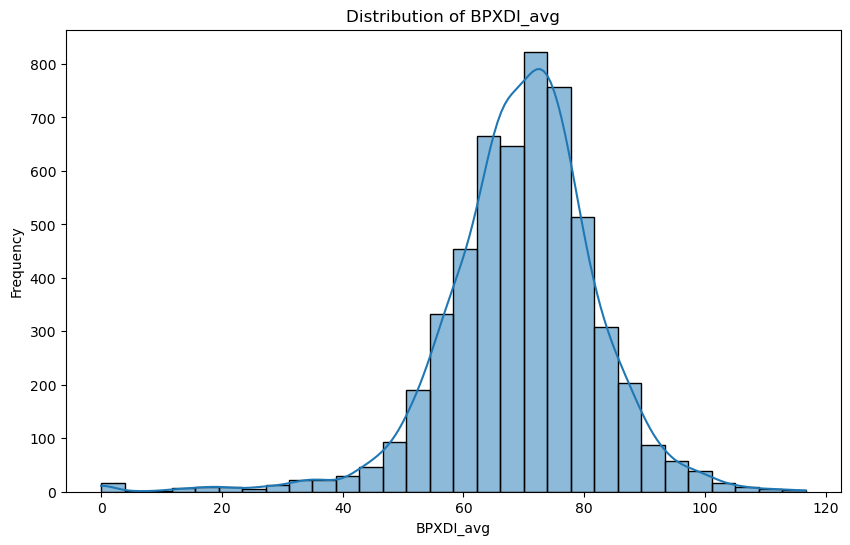

In [14]:
df['BPXDI_avg'] = df[['BPXDI1', 'BPXDI2', 'BPXDI3']].apply(
    lambda x: x.mean() if x.count() > 0 else pd.NA, axis=1
)

print(df[['BPXDI1', 'BPXDI2', 'BPXDI3', 'BPXDI_avg']].head())


missing_bpxdi_avg = df['BPXDI_avg'].isna().sum()

total_rows = len(df)

missing_percentage = (missing_bpxdi_avg / total_rows) * 100
print(f"Percentage of missing values in 'BPXDI_avg' based on the entire dataset: {missing_percentage:.2f}%")


data_non_na = df['BPXDI_avg'].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(data_non_na, kde=True, bins=30)
plt.title('Distribution of BPXDI_avg')
plt.xlabel('BPXDI_avg')
plt.ylabel('Frequency')
plt.show

bpxdi_avg_mean = df['BPXDI_avg'].mean()
bpxdi_avg_median = df['BPXDI_avg'].median()
bpxdi_avg_variance = df['BPXDI_avg'].var()

print("Mean of BPXDI_avg:", bpxdi_avg_mean)
print("Median of BPXDI_avg:", bpxdi_avg_median)
print("Variance of BPXDI_avg:", bpxdi_avg_variance)

In [15]:
bins = [20, 40, 60, 81]
labels = ['20-40', '40-60', '60-81']
df['AgeGroup'] = pd.cut(df['RIDAGEYR'], bins=bins, labels=labels, right=False)

In [16]:

median_bpxdi_avg_per_age_group = df.groupby('AgeGroup')['BPXDI_avg'].median()


for group, median_value in median_bpxdi_avg_per_age_group.items():
    df.loc[df['AgeGroup'] == group, 'BPXDI_avg'] = df.loc[df['AgeGroup'] == group, 'BPXDI_avg'].fillna(median_value)


print(df['BPXDI_avg'].isna().sum())  # This should now print 0 if all missing values were imputed correctly
print(median_bpxdi_avg_per_age_group)  # This will display the median values used for imputation

0
AgeGroup
20-40         68.0
40-60    73.333333
60-81    68.666667
Name: BPXDI_avg, dtype: object


C:\Users\Mohit R Kamble\AppData\Local\Temp\ipykernel_17228\1558137317.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_bpxdi_avg_per_age_group = df.groupby('AgeGroup')['BPXDI_avg'].median()


In [17]:
df = df.drop(columns=['BPXDI1', 'BPXDI2', 'BPXDI3'])

In [18]:
df['BPXSY_avg'] = df[['BPXSY1', 'BPXSY2', 'BPXSY3']].apply(
    lambda x: x.mean() if x.count() > 0 else pd.NA, axis=1
)

print(df[['BPXSY1', 'BPXSY2', 'BPXSY3', 'BPXSY_avg']].head())

missing_BPXSY_avg = df['BPXSY_avg'].isna().sum()

total_rows = len(df)

missing_percentage_BPXSY_avg = (missing_BPXSY_avg / total_rows) * 100
print(f"Percentage of missing values in 'BPXSY_avg' based on the entire dataset: {missing_percentage_BPXSY_avg:.2f}%")


median_BPXSY_avg_per_age_group = df.groupby('AgeGroup')['BPXSY_avg'].median()


for group, median_value in median_BPXSY_avg_per_age_group.items():
    df.loc[df['AgeGroup'] == group, 'BPXSY_avg'] = df.loc[df['AgeGroup'] == group, 'BPXSY_avg'].fillna(median_value)


print(df['BPXSY_avg'].isna().sum())  # This should now print 0 if all missing values were imputed correctly
print(median_BPXSY_avg_per_age_group)  # This will display the median values used for imputation

   BPXSY1  BPXSY2  BPXSY3   BPXSY_avg
0   122.0   114.0   102.0  112.666667
1   156.0   160.0   156.0  157.333333
2   140.0   140.0   146.0       142.0
3   136.0   134.0   142.0  137.333333
4   160.0   158.0   154.0  157.333333
Percentage of missing values in 'BPXSY_avg' based on the entire dataset: 3.58%
0
AgeGroup
20-40         114.0
40-60         120.0
60-81    131.333333
Name: BPXSY_avg, dtype: object


C:\Users\Mohit R Kamble\AppData\Local\Temp\ipykernel_17228\1907907637.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_BPXSY_avg_per_age_group = df.groupby('AgeGroup')['BPXSY_avg'].median()


In [19]:
df = df.drop(columns=['BPXSY1', 'BPXSY2', 'BPXSY3'])

In [20]:
df = df.drop(columns=['RXDDRUG', 'RXDDRGID', 'RXDRSD1'])

C:\Users\Mohit R Kamble\AppData\Local\Temp\ipykernel_17228\3302781803.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_bp = df.groupby(['AgeGroup', 'Gender']).agg({'BPXSY_avg': 'mean'}).unstack()
C:\Users\Mohit R Kamble\AppData\Local\Temp\ipykernel_17228\3302781803.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_cholesterol = df.groupby(['AgeGroup', 'Gender']).agg({'LBXSCR': 'mean'}).unstack()


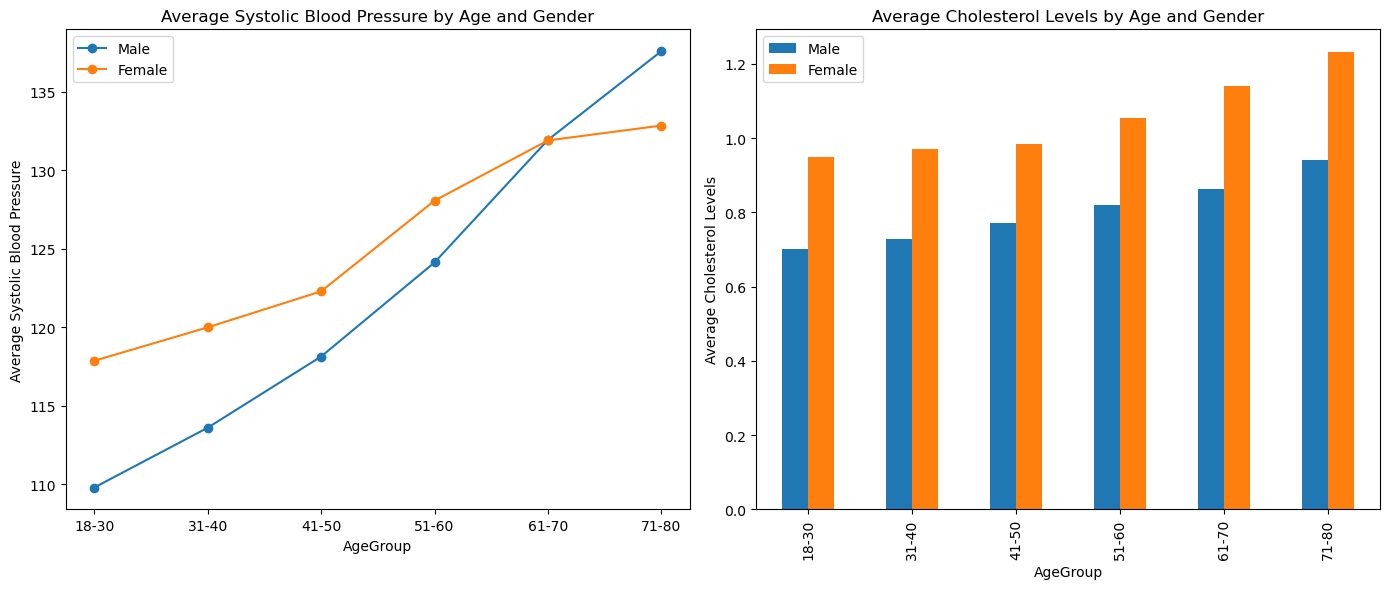

In [21]:

df['AgeGroup'] = pd.cut(df['RIDAGEYR'], bins=[18, 30, 40, 50, 60, 70, 80], labels=['18-30', '31-40', '41-50', '51-60', '61-70', '71-80'])
df['Gender'] = df['RIAGENDR'].replace({1: 'Male', 2: 'Female'})


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))


age_gender_bp = df.groupby(['AgeGroup', 'Gender']).agg({'BPXSY_avg': 'mean'}).unstack()
age_gender_cholesterol = df.groupby(['AgeGroup', 'Gender']).agg({'LBXSCR': 'mean'}).unstack()


age_gender_bp.plot(kind='line', ax=axes[0], marker='o')
axes[0].set_title('Average Systolic Blood Pressure by Age and Gender')
axes[0].set_xlabel('AgeGroup')
axes[0].set_ylabel('Average Systolic Blood Pressure')
axes[0].legend(['Male', 'Female'])


age_gender_cholesterol = age_gender_cholesterol.loc[['18-30', '31-40', '41-50', '51-60', '61-70', '71-80']]  # Exclude '81-90'
age_gender_cholesterol.plot(kind='bar', ax=axes[1], color=['#1f77b4', '#ff7f0e'])
axes[1].set_title('Average Cholesterol Levels by Age and Gender')
axes[1].set_xlabel('AgeGroup')
axes[1].set_ylabel('Average Cholesterol Levels')
axes[1].legend(['Male', 'Female'])

plt.tight_layout()
plt.show()

In [22]:
import pandas as pd
 
df['OSQ130'].replace(pd.NA, 'NA', inplace=True)
 
def get_age_group(age):
    if 20 <= age <= 40:
        return '20-40'
    elif 40 < age <= 60:
        return '40-60'
    else:
        return '60-80'
 
df['AgeGroup'] = df['RIDAGEYR'].apply(get_age_group)
 
age_groups_distribution = {}
for age_group in ['20-40', '40-60', '60-80']:
    subset = df[df['AgeGroup'] == age_group].copy()
    subset.replace('NA', pd.NA, inplace=True)
    valid_values = subset['OSQ130'].dropna().value_counts(normalize=True)
    age_groups_distribution[age_group] = valid_values
 
for age_group, dist in age_groups_distribution.items():
    max_value = dist.idxmax()  # Get the most frequent value among 1, 2, and 9
    mask = (df['AgeGroup'] == age_group) & (df['OSQ130'].isna())
    df.loc[mask, 'OSQ130'] = max_value
 
print(df)

       SEQN  RIAGENDR  RIDAGEYR  RIDRETH3  INDFMIN2  DR1TPROT  DR1TSFAT  \
0     73557         1        69         4       4.0     43.63   17.8190   
1     73558         1        54         3       7.0    338.13   53.4080   
2     73559         1        72         3      10.0     64.61   25.2630   
3     73561         2        73         3      15.0     55.24    4.4790   
4     73562         1        56         1       9.0     55.11   22.1550   
...     ...       ...       ...       ...       ...       ...       ...   
5583  83723         1        61         1      10.0     70.52   35.2660   
5584  83724         1        80         3       8.0     77.09   24.0060   
5585  83726         1        40         1       9.0     76.87   22.6325   
5586  83727         1        26         2      77.0    223.32   80.4140   
5587  83729         2        42         4       7.0     89.37   29.3720   

      DR1TMFAT  DR1TPFAT  BPXPLS  ...  LBDSBUSI  RXDUSE  DIQ010  OSQ130  \
0       18.493    8.8290

# Replacing remaining variables's null values with median

In [23]:

variables = ['INDFMIN2', 'BPXPLS', 'LBDSCRSI', 'LBDSALSI', 'LBXSBU', 'LBXSCR', 'LBDSBUSI']


for var in variables:
    median_value = df[var].median()
    df[var].fillna(median_value, inplace=True)


null_counts = df[variables].isnull().sum()

print(df[variables].head())

print("\n" * 2)

print(df.isnull().mean()*100)


   INDFMIN2  BPXPLS  LBDSCRSI  LBDSALSI  LBXSBU  LBXSCR  LBDSBUSI
0       4.0    86.0    106.96      41.0    10.0    1.21      3.57
1       7.0    74.0     69.84      47.0    16.0    0.79      5.71
2      10.0    68.0    107.85      37.0    14.0    1.22      5.00
3      15.0    92.0     64.53      43.0    31.0    0.73     11.07
4       9.0    60.0     78.68      43.0    18.0    0.89      6.43



SEQN         0.0
RIAGENDR     0.0
RIDAGEYR     0.0
RIDRETH3     0.0
INDFMIN2     0.0
DR1TPROT     0.0
DR1TSFAT     0.0
DR1TMFAT     0.0
DR1TPFAT     0.0
BPXPLS       0.0
LBDSCRSI     0.0
LBDSALSI     0.0
LBXSBU       0.0
LBXSCR       0.0
LBDSBUSI     0.0
RXDUSE       0.0
DIQ010       0.0
OSQ130       0.0
KIQ022       0.0
KIQ026       0.0
BPXDI_avg    0.0
AgeGroup     0.0
BPXSY_avg    0.0
Gender       0.0
dtype: float64


### Models

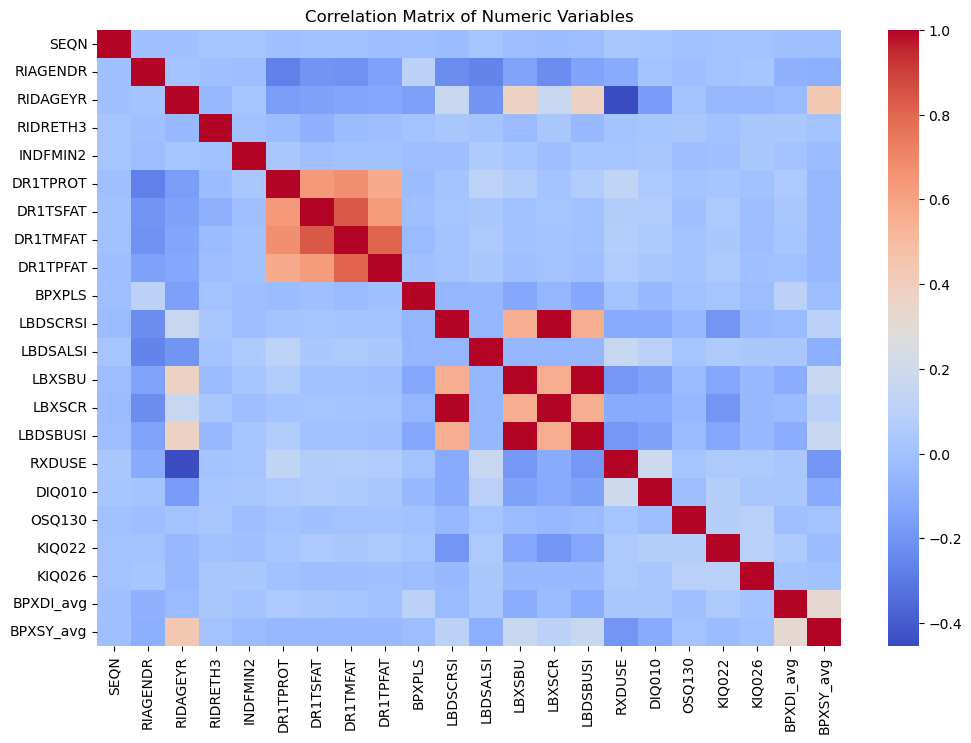

C:\Users\Mohit R Kamble\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


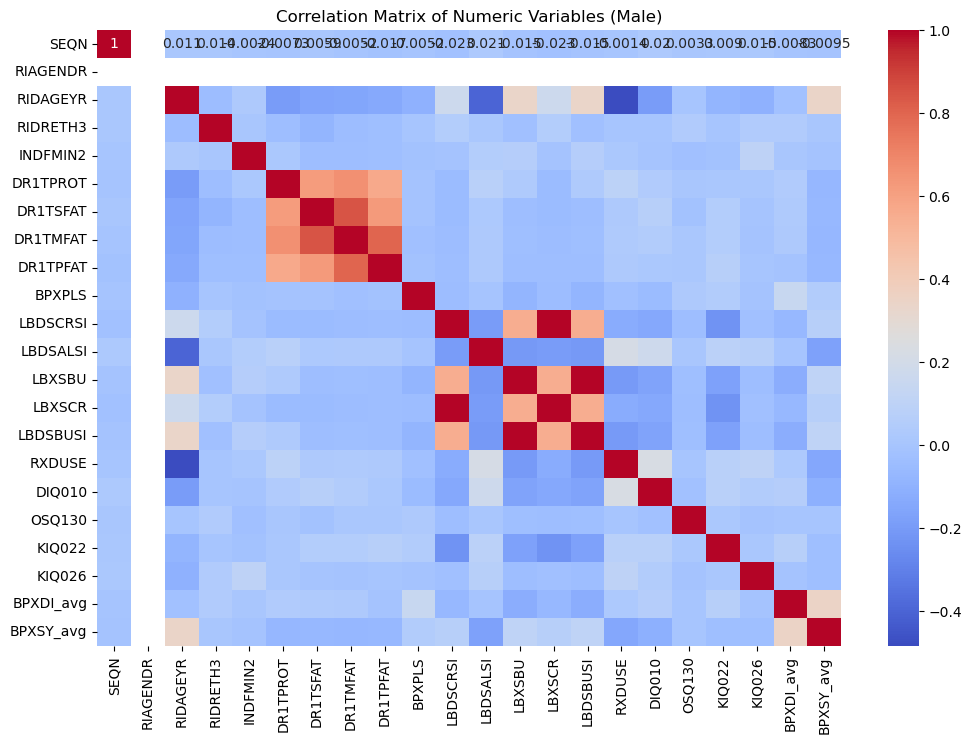

C:\Users\Mohit R Kamble\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


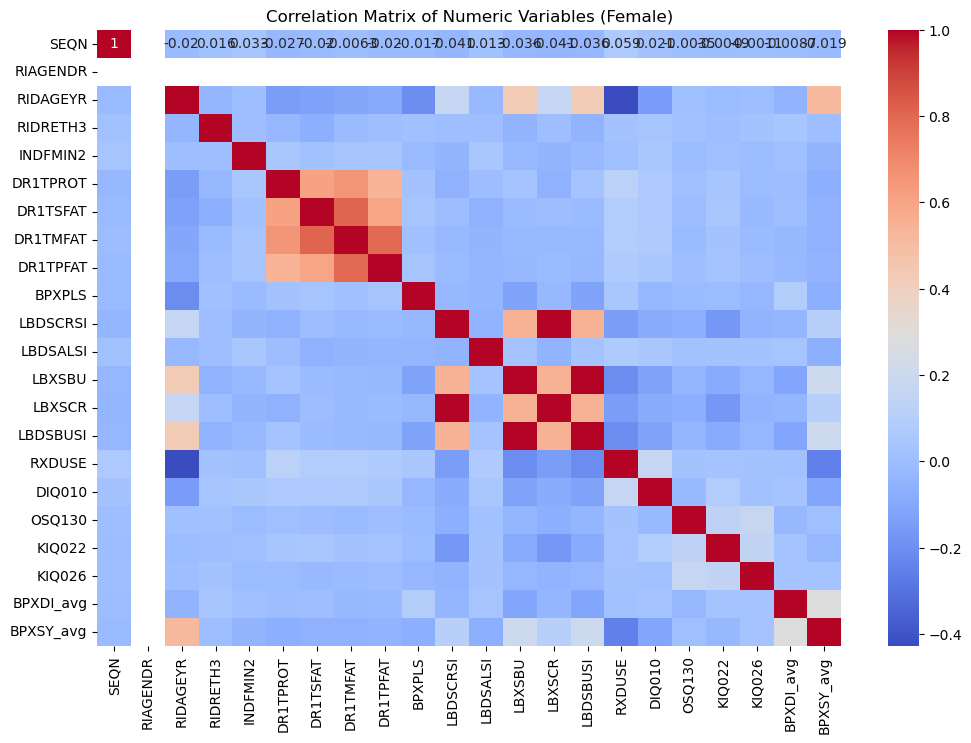

In [37]:
for col in df.columns:

    df[col] = pd.to_numeric(df[col], errors='coerce')
 
# Drop columns with any non-convertible values (completely non-numeric columns)

df = df.select_dtypes(include=[np.number])
 
# Calculate the correlation matrix, ignoring missing values

correlation_matrix = df.corr(method='pearson')  # Pearson still appropriate here
 
# Plotting the correlation matrix without annotations

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, cmap='coolwarm')

plt.title('Correlation Matrix of Numeric Variables')

plt.show()

# Convert all columns to numeric, coercing errors to NaN
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop columns with any non-convertible values (completely non-numeric columns)
df = df.select_dtypes(include=[np.number])

# Define the function to plot heatmap
def plot_correlation_heatmap(df, title):
    correlation_matrix = df.corr(method='pearson')  # Pearson correlation
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
    plt.title(title)
    plt.show()

# Filter DataFrame for males and females
df_male = df[df['RIAGENDR'] == 1]
df_female = df[df['RIAGENDR'] == 2]

# Plot heatmaps
plot_correlation_heatmap(df_male, 'Correlation Matrix of Numeric Variables (Male)')
plot_correlation_heatmap(df_female, 'Correlation Matrix of Numeric Variables (Female)')

In [34]:
df=df.drop(columns=['AgeGroup','Gender'])

C:\Users\Mohit R Kamble\AppData\Local\Temp\ipykernel_17228\2718881013.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['KIQ022'] = df_filtered['KIQ022'].map({1: 1, 2: 0})


         Current function value: 0.277907
         Iterations: 35


C:\Users\Mohit R Kamble\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Mohit R Kamble\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Mohit R Kamble\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Mohit R Kamble\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Mohit R Kamble\anaconda3\Lib\site-packages\statsmodels\

Selected Features: ['RIAGENDR', 'DR1TSFAT', 'LBDSCRSI', 'LBDSALSI', 'LBXSBU', 'RXDUSE', 'DIQ010', 'OSQ130', 'BPXDI_avg', 'BPXSY_avg']
Optimization terminated successfully.
         Current function value: 0.098411
         Iterations 9
Model Accuracy: 0.9659701492537314
Confusion Matrix:
[[1605    2]
 [  55   13]]


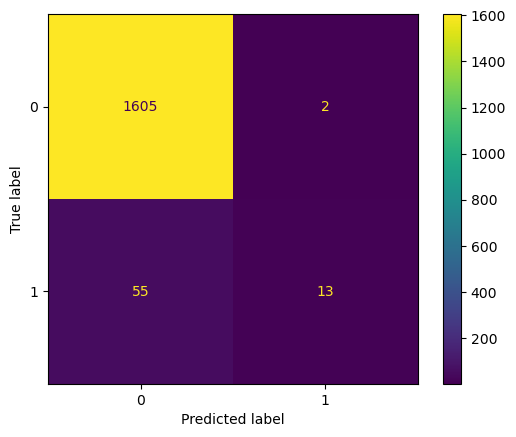

In [38]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
 
# Assuming your dataframe is named df and target variable is 'KIQ022'
 
# Drop rows where 'KIQ022' is 9
df_filtered = df[df['KIQ022'] != 9]

# Convert 'KIQ022' values: 1 as 1 and 2 as 0
df_filtered['KIQ022'] = df_filtered['KIQ022'].map({1: 1, 2: 0})

# Prepare the features and target variable
X = df_filtered.drop(columns=['KIQ022'])
y = df_filtered['KIQ022']

 
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Adding a constant column for the intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
 
# Fit the full model
model = sm.Logit(y_train, X_train).fit()
 
def backward_selection(X, y, criterion='aic'):
    """ Perform backward selection using the specified criterion ('aic' or 'bic'). """
    cols = list(X.columns)
    best_aic = model.aic
    while len(cols) > 1:
        aic_with_feature = []
        for col in cols:
            cols_temp = cols.copy()
            cols_temp.remove(col)
            model_temp = sm.Logit(y, X[cols_temp]).fit(disp=0)
            aic_with_feature.append((model_temp.aic, col))
        aic_with_feature.sort()
        best_aic_temp, feature_to_remove = aic_with_feature[0]
        if best_aic_temp < best_aic:
            best_aic = best_aic_temp
            cols.remove(feature_to_remove)
        else:
            break
    return cols
 
# Perform backward selection
selected_features = backward_selection(X_train, y_train)
print("Selected Features:", selected_features)
 
# Train the model with selected features
model = sm.Logit(y_train, X_train[selected_features]).fit()
 
# Make predictions on the test set
y_pred = model.predict(X_test[selected_features]) >= 0.5  # Thresholding at 0.5
 
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
 
# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
 
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [39]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1607
           1       0.87      0.19      0.31        68

    accuracy                           0.97      1675
   macro avg       0.92      0.59      0.65      1675
weighted avg       0.96      0.97      0.96      1675



### Gradient Boosting

C:\Users\Mohit R Kamble\AppData\Local\Temp\ipykernel_17228\965776388.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['KIQ022'] = label_encoder.fit_transform(df_filtered['KIQ022'])


Accuracy: 0.9635820895522388
Confusion Matrix:
[[1600    7]
 [  54   14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1607
           1       0.67      0.21      0.31        68

    accuracy                           0.96      1675
   macro avg       0.82      0.60      0.65      1675
weighted avg       0.96      0.96      0.95      1675



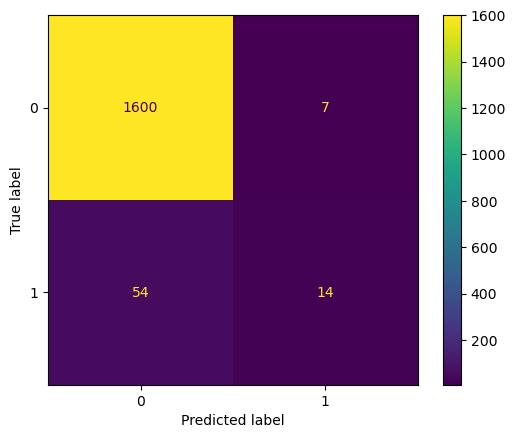

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming 'KIQ022' is the dependent variable and 'Selected Features' are the features used
selected_features = ['RIAGENDR', 'DR1TSFAT', 'LBDSCRSI', 'LBDSALSI', 'LBXSBU', 
                     'RXDUSE', 'DIQ010', 'OSQ130', 'BPXDI_avg', 'BPXSY_avg']

# Drop rows with missing target values
#df = df_filtered

# Fill or drop missing values for features as appropriate
#df = df_filtered.dropna(subset=selected_features)

# Encode categorical variables if necessary
# Assuming 'KIQ022' and some features might be categorical
label_encoder = LabelEncoder()
df_filtered['KIQ022'] = label_encoder.fit_transform(df_filtered['KIQ022'])

# Split data into features (X) and target (y)
X = df_filtered[selected_features]
y = df_filtered['KIQ022']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = gb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


# Display the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()